## Exercise Interpolation

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

In [7]:
# higher order function
# functor
# function that returns function
# partial
def make_adder(c):
    def ret(x):
        return x + c
    return ret

f = make_adder(3)
f(1)
g = make_adder(10)
g(100)

110

In [14]:
from typing import List
def generate_w(anchor: float, others: List[float]):
    """
    return w(x) such that w(anchor) is 1 and w(x)=0 for all x in others
    """
    def w(x):
        numerator = np.prod([x-o for o in others])
        denom = np.prod([anchor-o for o in others])
        return numerator/denom
    return w

w = generate_w(1, [2, 3, 4.5])
assert abs(w(1)-1) < 1e-7
assert abs(w(2)) < 1e-7
assert abs(w(3)) < 1e-7
assert abs(w(4.5)) < 1e-7    
assert abs(w(1)-1) < 1e-7
assert abs(w(2)-0) < 1e-7

generate_w(1, [2, 3, 4.5])(1)

1.0

In [12]:
?np.prod

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

In [18]:
a = [0,1,2,3,4]
a[:2]
a[2:]

[2, 3, 4]

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

6.728125

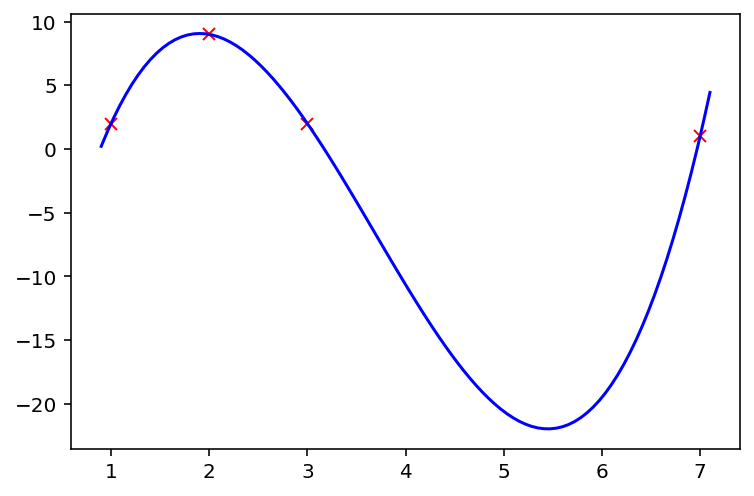

In [30]:
def make_lagrange(xs: List[float], ys: List[float]):
    """
    return larange(x)
    such that larange(x) = y for x,y in zip(xs, ys)
    """
    ws = []
    for x in xs:
        others = [a for a in xs if a!=x]
        ws.append(generate_w(x, others))
        
    def lagrange(x):
        return sum(y*w(x) for w,y in zip(ws, ys))
    return lagrange
xs = [1,2,3,7]
ys = [2,9,2,1]
lagrange = make_lagrange(xs, ys)
lagrange(7)
plt.plot(xs, ys, 'xr')
xxs = np.linspace(min(xs)-0.1, max(xs)+0.1, 100)
yys = [lagrange(x) for x in xxs]
plt.plot(xxs, yys, '-b')
# lagrange(1) --> 2

lagrange(2.5)

4) Write a function `ledendre(x)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5)`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

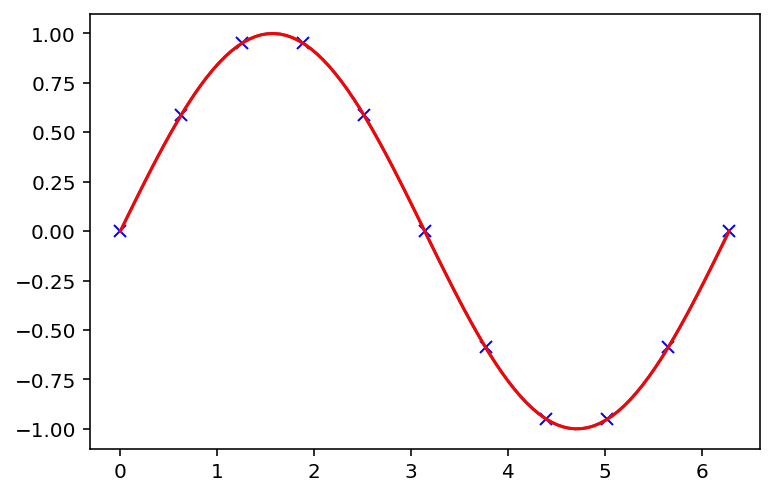

In [39]:
xs = np.linspace(0, 2*np.pi, 11)
ys = np.sin(xs)
plt.plot(xs, ys, 'xb')
legrange = make_lagrange(xs, ys)
xxs = np.linspace(0, 2*np.pi, 100)
ls = [legrange(x) for x in xxs]
plt.plot(xxs, ls)

plt.plot(xxs, np.sin(xxs), '-r')


6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

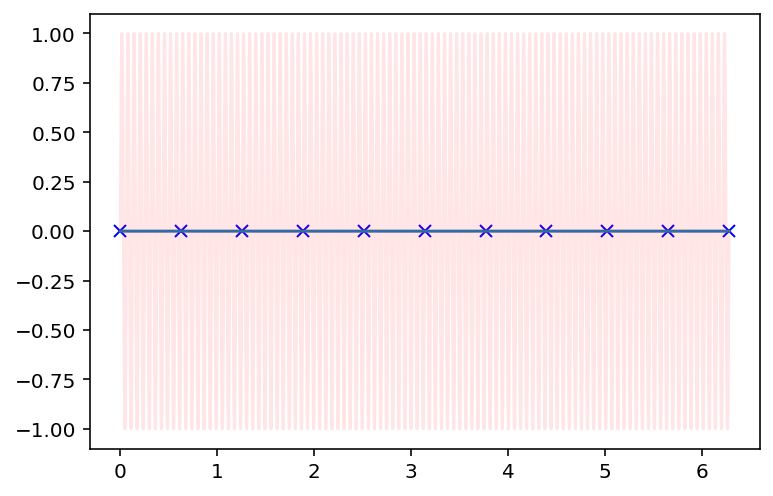

In [44]:
xs = np.linspace(0, 2*np.pi, 11)
ys = np.sin(100*xs)
plt.plot(xs, ys, 'xb')
legrange = make_lagrange(xs, ys)
xxs = np.linspace(0, 2*np.pi, 10000)
ls = [legrange(x) for x in xxs]
plt.plot(xxs, ls)

plt.plot(xxs, np.sin(100*xxs), '-r', alpha=0.1)

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(200*x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

8) Does it pass through all the point? Does it look like the original function?

## Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [45]:
3**4/4-1/4

20.0

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [50]:
def trap(f, x0: float, xn: float, n: int):
    h = (xn - x0)/n
    s = f(x0) + 2*sum(f(x0 + i*h)for i in range(1, n))+f(xn)
    return 1/2*h*s

def f(x):
    return x**3

trap(f, 1, 3, 1000)

20.00000800000001

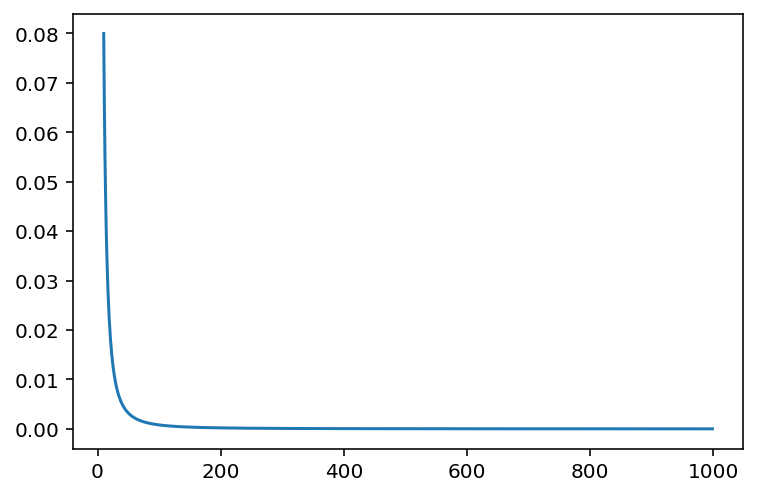

In [55]:
ns = list(range(10, 1000))
error = [abs(20 - trap(f, 1, 3, n)) for n in ns]
plt.plot(ns, error)

2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

19.9996 20.002


3) What is the bound on error for 1)?

In [3]:
3**4/4 - 1/4

20.0

4) What is the bound on error for 2)?

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those integral you can't do by hands. 

6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

7) Compute the integral above and make sure your answer is at most $10^{-6}$ away from the real answer. 